In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py
import plotly.offline
import plotly.graph_objs as go
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [211]:
King_County = pd.read_csv('/Users/flatironschool/Downloads/kc_house_data.csv')

In [212]:
King_County.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [213]:
King_County.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
kc_neighborhood = pd.DataFrame(King_County[['id', 'price','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])
#We divided data into four categories based on what variables we thought went together.

In [10]:
kc_neighborhood.head()

,id,price,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,98074,47.6168,-122.045,1800,7503


In [28]:
kc_status = pd.DataFrame(King_County[['id', 'price', 'condition', 'grade', 'yr_built', 'yr_renovated']])
#another group of variables that relate to the status of the home

In [12]:
kc_status.head()

,id,price,condition,grade,yr_built,yr_renovated
0,7129300520,221900.0,3,7,1955,0.0
1,6414100192,538000.0,3,7,1951,1991.0
2,5631500400,180000.0,3,6,1933,NaN
3,2487200875,604000.0,5,7,1965,0.0
4,1954400510,510000.0,3,8,1987,0.0


In [15]:
kc_neighborhood.describe()

,id,price,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
kc_neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
id               21597 non-null int64
price            21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


In [17]:
kc_status.describe()

,id,price,condition,grade,yr_built,yr_renovated
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000
mean,4.580474e+09,5.402966e+05,3.409825,7.657915,1970.999676,83.636778
std,2.876736e+09,3.673681e+05,0.650546,1.173200,29.375234,399.946414
min,1.000102e+06,7.800000e+04,1.000000,3.000000,1900.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,7.000000,1951.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,7.000000,1975.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,8.000000,1997.000000,0.000000
max,9.900000e+09,7.700000e+06,5.000000,13.000000,2015.000000,2015.000000


In [209]:
King_County['yr_renovated'].value_counts().head()
#78% of homes have not recorded a renovation with the tax authorities

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [56]:
17011/21597 #year renovated = 0/total count

0.787655692920313

In [34]:
kc_status['yr_built'].value_counts().head()

2014    559
2006    453
2005    450
2004    433
2003    420
Name: yr_built, dtype: int64

Text(0, 0.5, 'Number of Starts')

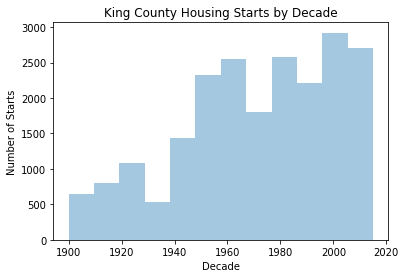

In [208]:
p = sns.distplot(King_County['yr_built'], bins = 12, kde = False)
p.set_title('King County Housing Starts by Decade')
p.set_xlabel('Decade')
p.set_ylabel('Number of Starts')

#the Boeing workforce was cut from 80,400 to 37,200 between early 1970 and October 1971".
#some combination of the subsequent 1990 oil price shock, the debt accumulation of the 1980s,
#and growing consumer pessimism combined with the weakened economy to produce a brief recession.

In [19]:
kc_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
id              21597 non-null int64
price           21597 non-null float64
condition       21597 non-null int64
grade           21597 non-null int64
yr_built        21597 non-null int64
yr_renovated    17755 non-null float64
dtypes: float64(2), int64(4)
memory usage: 1012.4 KB


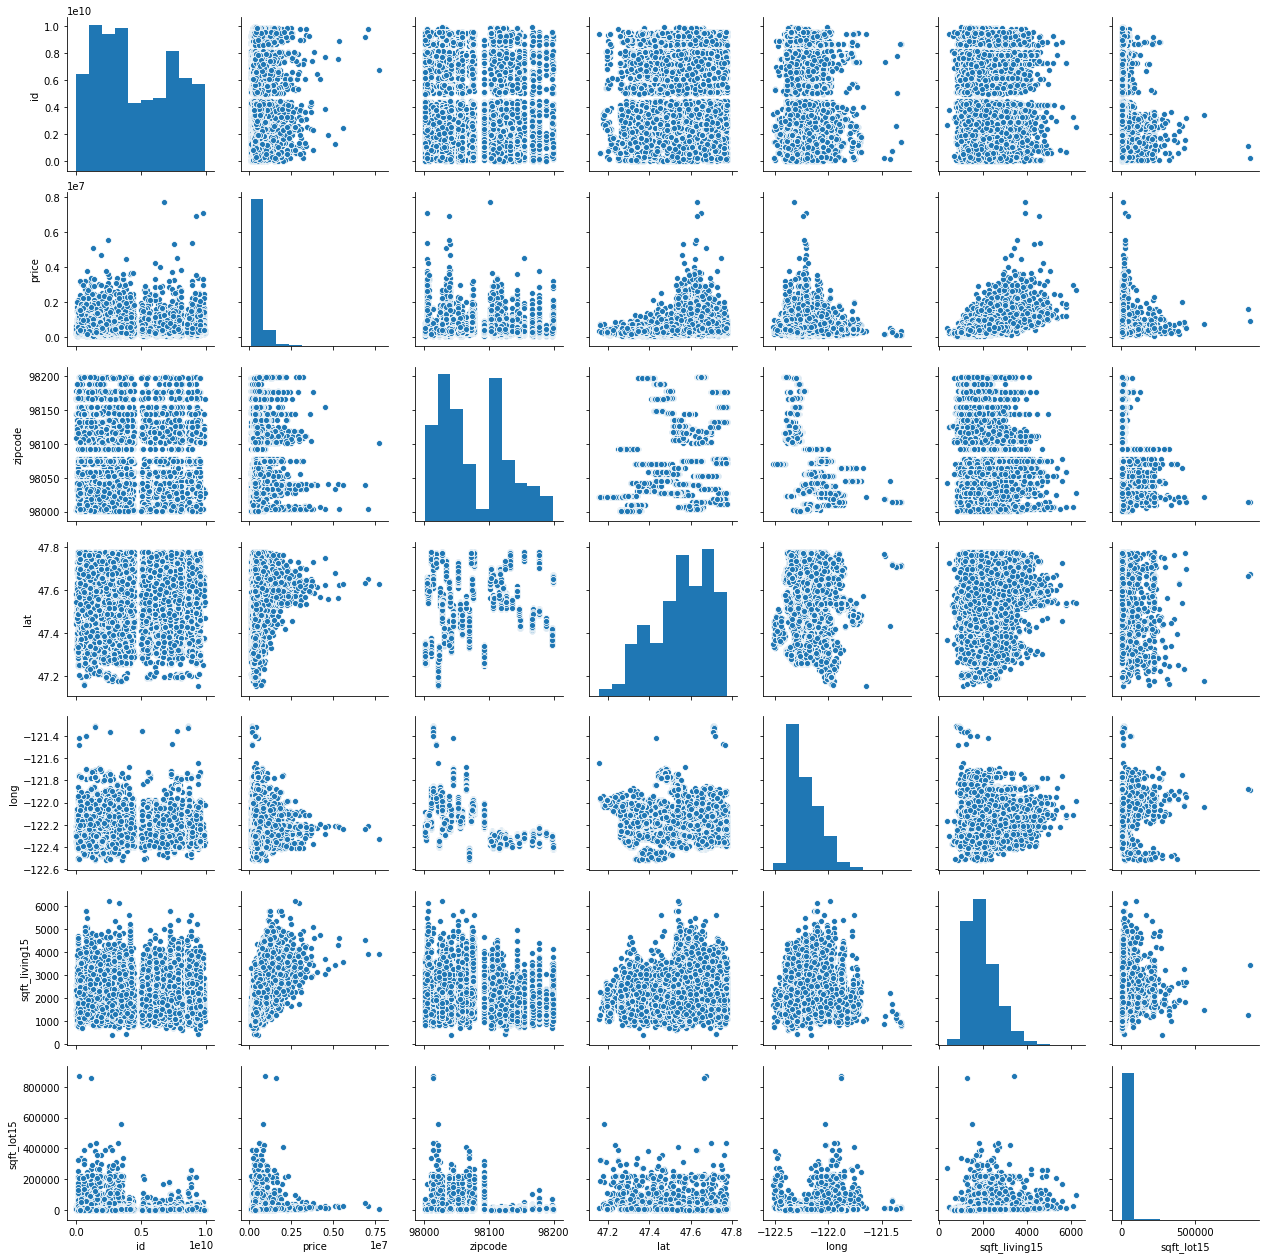

In [22]:
sns.pairplot(kc_neighborhood, palette = 'hus1')

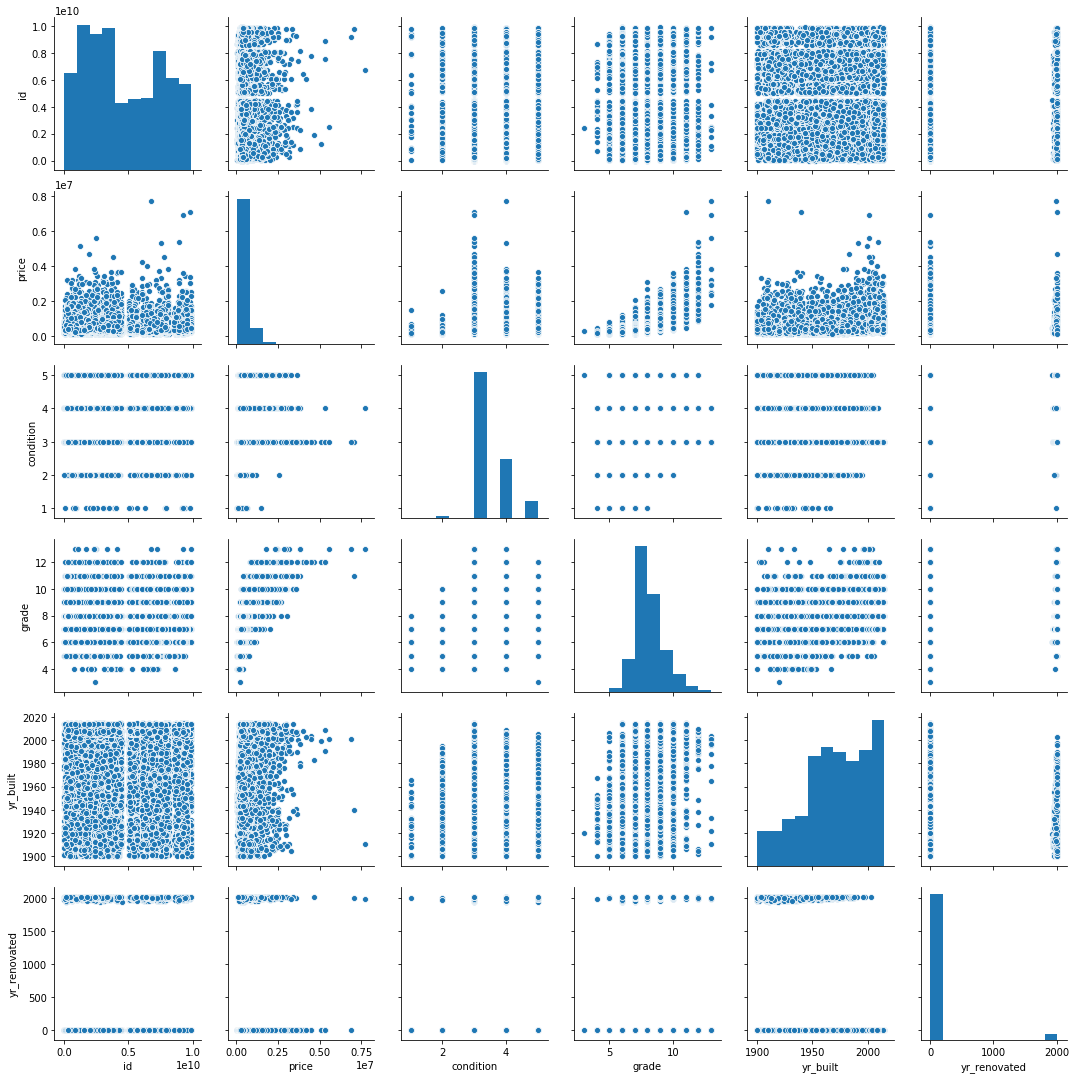

In [23]:
sns.pairplot(kc_status)

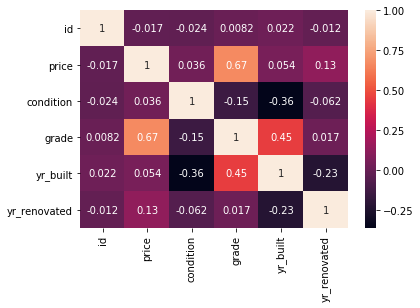

In [29]:
kc_status_c = kc_status.corr()
sns.heatmap(kc_status_c, annot = True)

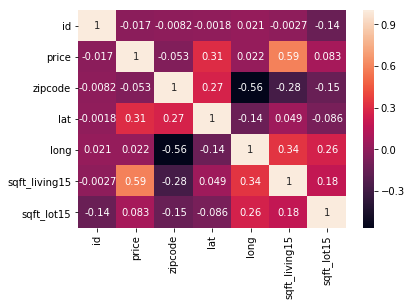

In [31]:
kc_neighborhood_c = kc_neighborhood.corr()
sns.heatmap(kc_neighborhood_c, annot = True)

In [ ]:
King_County['decade_built'] = for i in King_County['yr_built']:
    if i > 2010:
        

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



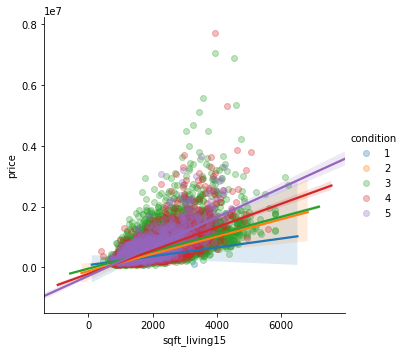

In [70]:
sns.lmplot(x = 'sqft_living15', y = 'price', hue = 'condition', scatter_kws={'alpha':0.3}, data = King_County)


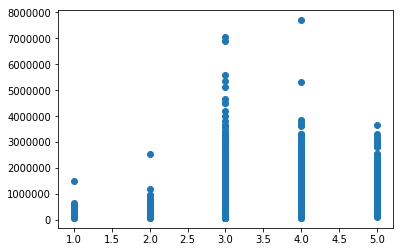

In [65]:
plt.scatter(x = 'condition', y = 'price', data = King_County)

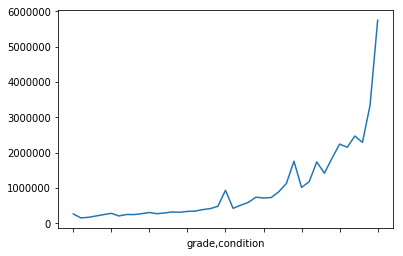

In [74]:
kc_status.groupby(['grade', 'condition'])['price'].mean().plot()
#selects both grade and condition and then calculates the mean for each sub category.
#clearly shows that higher grade (runs 1 - 13, reflects that buildings of better quality 
#materials cost more to build per unit of measure and command higher value) and current higher 
#building condition (runs Poor - 1 to Very Good - 5)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



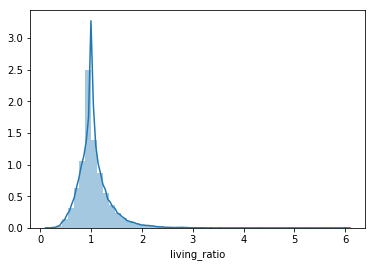

In [80]:
kc_neighborhood['living_ratio'] = King_County['sqft_living']/kc_neighborhood['sqft_living15']
kc_neighborhood['living_ratio'].head()
sns.distplot(kc_neighborhood['living_ratio'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



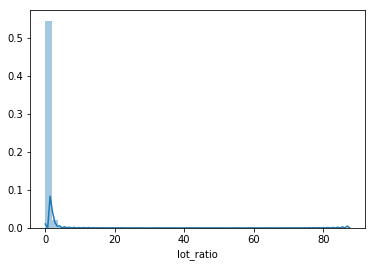

In [84]:
kc_neighborhood['lot_ratio'] = King_County['sqft_lot']/kc_neighborhood['sqft_lot15']
kc_neighborhood['lot_ratio'].head()
sns.distplot(kc_neighborhood['lot_ratio'])

In [117]:
#final model looks very promising
y = kc_status['price']
X = kc_status[['condition', 'grade', 'yr_built']]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [119]:
lm = LinearRegression()

In [120]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
lm.coef_

array([ 31699.46303583, 254452.64557483,  -3652.25644896])

In [122]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [123]:
predictions = lm.predict(X_test)
predictions

array([201951.20227724, 251911.94755787, 317618.10279165, ...,
       379706.46242395, 356622.0787254 , 741385.11145794])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



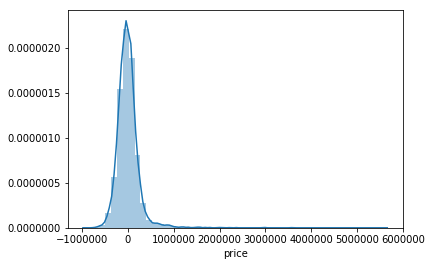

In [124]:
sns.distplot((y_test - predictions))

In [126]:
#model includes grade, condition, year built
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  159963.48740020848
MSE:  64207311585.74143
RMSE:  253391.61703920166


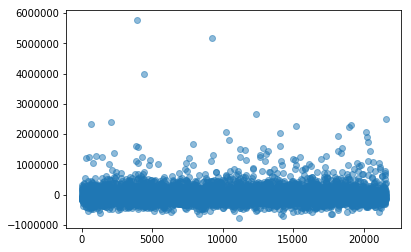

In [115]:
plt.scatter(y_test.index, y_test - predictions, alpha = .5)

In [127]:
#wanted to slightly improve it with a more highly correlated variable
y = King_County['price']
X = King_County[['condition', 'grade', 'sqft_living15']]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [129]:
lm = LinearRegression()

In [130]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
lm.coef_

array([7.81558924e+04, 1.68210583e+05, 1.16301002e+02])

In [132]:
cdf1 = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [133]:
predictions1 = lm.predict(X_test)
predictions1

array([443184.10025653, 244735.25687072, 593715.31170169, ...,
       709087.52458391, 563477.05127961, 410385.59852692])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



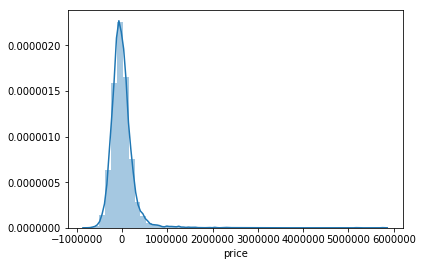

In [134]:
sns.distplot((y_test - predictions1))

In [135]:
#model includes grade, condition, and sqft_living15
print('MAE: ', metrics.mean_absolute_error(y_test, predictions1))
print('MSE: ', metrics.mean_squared_error(y_test, predictions1))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE:  167279.22266138974
MSE:  71052457089.54913
RMSE:  266556.66768915975


In [136]:
#tried with four variables
y = King_County['price']
X = King_County[['condition', 'grade', 'sqft_living15', 'yr_built']]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [138]:
lm = LinearRegression()

In [139]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
lm.coef_

array([ 2.71011002e+04,  2.01072156e+05,  1.16966207e+02, -3.64720139e+03])

In [141]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [143]:
predictions3 = lm.predict(X_test)
predictions3

array([360463.27539707, 521405.88268062, 625172.48668204, ...,
       477160.87978933, 722995.83802792, 431525.89751811])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



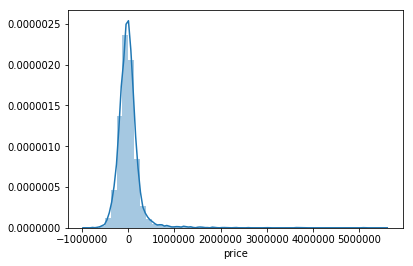

In [144]:
sns.distplot((y_test - predictions3))

In [145]:
#model includes grade, condition, year built, and sqft_living15
#model performs best in MAE, not as good for MSE and RSME
print('MAE: ', metrics.mean_absolute_error(y_test, predictions3))
print('MSE: ', metrics.mean_squared_error(y_test, predictions3))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

MAE:  152803.1350269903
MSE:  66538937049.428375
RMSE:  257951.42381740865


In [153]:
kc_neighborhood['zipcode'] = King_County['zipcode'].astype(object)

In [154]:
kc_neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
id               21597 non-null int64
price            21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
living_ratio     21597 non-null float64
lot_ratio        21597 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.5+ MB


In [156]:
y = King_County['price']
X = King_County[['condition', 'grade', 'zipcode']]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [158]:
lm = LinearRegression()

In [159]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [160]:
lm.coef_

array([ 78280.83200426, 221075.58281849,    556.03435758])

In [161]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [163]:
predictions4 = lm.predict(X_test)
predictions4

array([-312291.87538168,  400857.95284153,  550311.1826159 , ...,
        399745.88412637,   98151.39854249,  607040.62041976])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



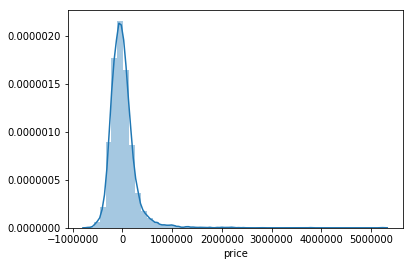

In [164]:
sns.distplot(y_test - predictions4)

In [165]:
#model includes grade, condition, zipcode
print('MAE: ', metrics.mean_absolute_error(y_test, predictions4))
print('MSE: ', metrics.mean_squared_error(y_test, predictions4))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

MAE:  173290.931927676
MSE:  71981866318.75647
RMSE:  268294.3650521875


In [173]:
kc_all_variables = pd.DataFrame(King_County[['price', 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 'sqft_living15']])


In [174]:
kc_all_vc = kc_all_variables.corr()

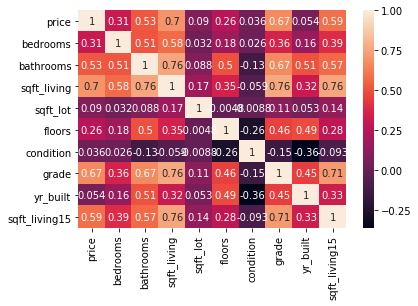

In [177]:
sns.heatmap(kc_all_vc, annot = True)

In [180]:
#model with four variables from both Ling & Helen's variables
X = King_County[['sqft_living', 'sqft_living15', 'grade', 'bathrooms']]
y = King_County['price']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

In [182]:
lm = LinearRegression()

In [183]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
lm.coef_

array([ 2.01684125e+02,  9.41430729e+00,  1.00275025e+05, -3.51537947e+04])

In [185]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [187]:
predictions5 = lm.predict(X_test)
predictions5

array([1090355.83730059,  478891.62229885,  180775.96907185, ...,
        390881.64621744,  633065.37559225,  750963.82813225])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



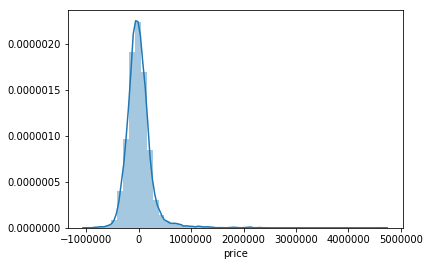

In [189]:
sns.distplot((y_test - predictions5))

In [190]:
#model includes sqft_living, sqft_living15, grade, bathrooms
print('MAE: ', metrics.mean_absolute_error(y_test, predictions5))
print('MSE: ', metrics.mean_squared_error(y_test, predictions5))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions5)))

MAE:  162076.6928853877
MSE:  60830971732.268814
RMSE:  246639.35560301162


In [191]:
#trying model with just two variables
X = King_County[['sqft_living15', 'grade']]
y = King_County['price']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

In [193]:
lm = LinearRegression()

In [194]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
lm.coef_

array([1.21032015e+02, 1.56981230e+05])

In [196]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [197]:
predictions6 = lm.predict(X_test)
predictions6

array([350240.56408845, 728349.99171827, 181156.13268939, ...,
       363554.08569902, 791286.63933185, 370816.00657751])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



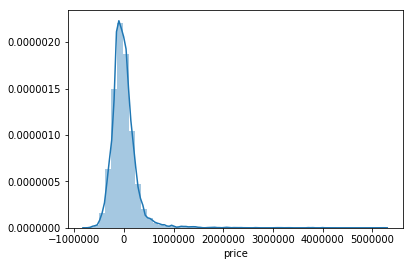

In [199]:
sns.distplot((y_test - predictions6))

In [200]:
#model includes sqft_living15, grade
print('MAE: ', metrics.mean_absolute_error(y_test, predictions6))
print('MSE: ', metrics.mean_squared_error(y_test, predictions6))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions6)))

MAE:  171930.79238056348
MSE:  76738117863.7744
RMSE:  277016.4577489475
